# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [79]:
# %pip install --upgrade plotly

### Import Statements

In [80]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [81]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [82]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [83]:
# What is the shape of `df_data`? How many rows and columns?
print (f'The Shape of df_dat is {df_data.shape}')
print (f'The number of rows in df_data is {df_data.shape[0]}'
       f' and the number of columns in df_data is {df_data.shape[1]}')

# What are the column names?
print (f'The column names are {df_data.columns}')

# In which year was the Nobel prize first awarded?
print (f'The year of the first award is {df_data["year"].min()}')

# Which year is the latest year included in the dataset?
print (f'The latest year in the dataset is {df_data["year"].max()}')

The Shape of df_dat is (962, 16)
The number of rows in df_data is 962 and the number of columns in df_data is 16
The column names are Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')
The year of the first award is 1901
The latest year in the dataset is 2020


In [84]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [85]:
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [86]:
df_data.duplicated(keep='last').sum()

np.int64(0)

### Check for NaN Values

In [87]:
# We have plenty of NaN values
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [88]:
df_data.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

In [89]:
import pandas as pd
df_data.birth_date = pd.to_datetime(df_data.birth_date)

In [90]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [91]:
df_data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
dtype: object

#### Add a Column with the Prize Share as a Percentage

In [92]:
shares = df_data.prize_share.str.split('/', expand=True)
df_data['share_pct'] = pd.to_numeric(shares[0])/pd.to_numeric(shares[1])
df_data.head()


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [93]:
df_data.dtypes

year                              int64
category                         object
prize                            object
motivation                       object
prize_share                      object
laureate_type                    object
full_name                        object
birth_date               datetime64[ns]
birth_city                       object
birth_country                    object
birth_country_current            object
sex                              object
organization_name                object
organization_city                object
organization_country             object
ISO                              object
share_pct                       float64
dtype: object

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [94]:
sex_df = df_data.sex.value_counts()

In [95]:
sex_df.head()

sex
Male      876
Female     58
Name: count, dtype: int64

In [96]:
fig = px.pie(labels = sex_df.index,
             values = sex_df.values,
             title = "Nobel prizes by Male, Female",
             names = sex_df.index,
             hole = 0.5,
)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')

fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [97]:
df_data.query('sex == "Female"').sort_values(by='year').head(3).full_name

18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object

In [98]:
df_data.query('sex == "Female"').sort_values(by='year').head(3).category


18       Physics
29         Peace
51    Literature
Name: category, dtype: object

In [99]:
df_data.query('sex == "Female"').sort_values(by='year').head(3).birth_country

18             Russian Empire (Poland)
29    Austrian Empire (Czech Republic)
51                              Sweden
Name: birth_country, dtype: object

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [100]:
df_data.full_name.duplicated().value_counts()

full_name
False    955
True       7
Name: count, dtype: int64

In [101]:
df_data[df_data.full_name.duplicated()]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR,0.25
523,1981,Peace,The Nobel Peace Prize 1981,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [102]:
dup_winner = df_data.duplicated(subset=['full_name'], keep=False)
mult_winner = df_data[dup_winner]
#mult_winner.head()
print(f'The are {mult_winner.full_name.nunique()} multiple winners')


The are 6 multiple winners


In [103]:
mult_winner[mult_winner['laureate_type']=='Individual'].sort_values(by='full_name').head(15)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR,0.25
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00


In [104]:
mult_winner[mult_winner['laureate_type']=='Organization'].sort_values(by='full_name').head(15)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
523,1981,Peace,The Nobel Peace Prize 1981,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [105]:
prize_by_category = df_data.category.value_counts()
prize_by_category

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

In [106]:
df_data.category.unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [107]:
prize_by_category = df_data.category.value_counts()

v_bar = px.bar(
    x = prize_by_category.index,
    y = prize_by_category.values,
    color = prize_by_category.values,
    title='Prize by Category',
    color_continuous_scale='Aggrnyl'
)

v_bar.update_layout(
    xaxis_title = 'Nobel Prize Category',
    coloraxis_showscale = False,
    yaxis_title = 'Prize Count',
)

v_bar.show()


In [108]:
men_and_women = df_data.groupby(['category', 'sex'],
                                as_index=False).agg({'prize': pd.Series.count})
men_and_women.sort_values('prize', ascending=False, inplace=True)
men_and_women.head(10)


v_bar_sex = px.bar (
    x = men_and_women.category,
    y = men_and_women.prize,
    color = men_and_women.sex,
    title="Prizes by sex",
)

v_bar_sex.update_layout (xaxis_title = 'Prize Category',
                         yaxis_title = 'Number of Prizes',
                         bargap = 0.1,
                         bargroupgap = 0.1
                         )

v_bar_sex.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [109]:
df_data[df_data.category == 'Economics'].sort_values(by='year', ascending=True).head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


In [110]:
df_data[df_data.category == 'Economics'].sort_values(by='year', ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [111]:
men_and_women = df_data.groupby(['category', 'sex'],
                                as_index=False).agg({'prize': pd.Series.count})
men_and_women.sort_values('prize', ascending=False, inplace=True)
men_and_women.head(10)

v_bar_sex = px.bar (
    x = men_and_women.category,
    y = men_and_women.prize,
    color = men_and_women.sex,
    title="Number of prizs awared per category by gender",
)

v_bar_sex.update_layout (xaxis_title = 'Prize Category',
                         yaxis_title = 'Number of Prizes',
                         bargap = 0.1,
                         bargroupgap = 0.1
                         )

v_bar_sex.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [112]:
# This shows we have different counts for each year.
df_data.groupby(['year']).count().prize

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [113]:
df_data[df_data.year == 1970]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
401,1970,Chemistry,The Nobel Prize in Chemistry 1970,"""for his discovery of sugar nucleotides and th...",1/1,Individual,Luis F. Leloir,1906-09-06,Paris,France,France,Male,Institute for Biochemical Research,Buenos Aires,Argentina,FRA,1.00
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00
403,1970,Literature,The Nobel Prize in Literature 1970,"""for the ethical force with which he has pursu...",1/1,Individual,Aleksandr Isayevich Solzhenitsyn,1918-12-11,Kislovodsk,Russia,Russia,Male,NaN,NaN,NaN,RUS,1.00
404,1970,Medicine,The Nobel Prize in Physiology or Medicine 1970,"""for their discoveries concerning the humoral ...",1/3,Individual,Julius Axelrod,1912-05-30,"New York, NY",United States of America,United States of America,Male,National Institutes of Health,"Bethesda, MD",United States of America,USA,0.33
405,1970,Medicine,The Nobel Prize in Physiology or Medicine 1970,"""for their discoveries concerning the humoral ...",1/3,Individual,Sir Bernard Katz,1911-03-26,Leipzig,Germany,Germany,Male,University College London,London,United Kingdom,DEU,0.33
406,1970,Medicine,The Nobel Prize in Physiology or Medicine 1970,"""for their discoveries concerning the humoral ...",1/3,Individual,Ulf von Euler,1905-02-07,Stockholm,Sweden,Sweden,Male,Karolinska Institutet,Stockholm,Sweden,SWE,0.33
407,1970,Peace,The Nobel Peace Prize 1970,NaN,1/1,Individual,Norman E. Borlaug,1914-03-25,"Cresco, IA",United States of America,United States of America,Male,NaN,NaN,NaN,USA,1.00
408,1970,Physics,The Nobel Prize in Physics 1970,"""for fundamental work and discoveries in magne...",1/2,Individual,Hannes Olof Gösta Alfvén,1908-05-30,Norrköping,Sweden,Sweden,Male,Royal Institute of Technology,Stockholm,Sweden,SWE,0.50
409,1970,Physics,The Nobel Prize in Physics 1970,"""for fundamental work and discoveries concerni...",1/2,Individual,Louis Eugène Félix Néel,1904-11-22,Lyon,France,France,Male,University of Grenoble,Grenoble,France,FRA,0.50


NameError: name 'prize_per_year' is not defined

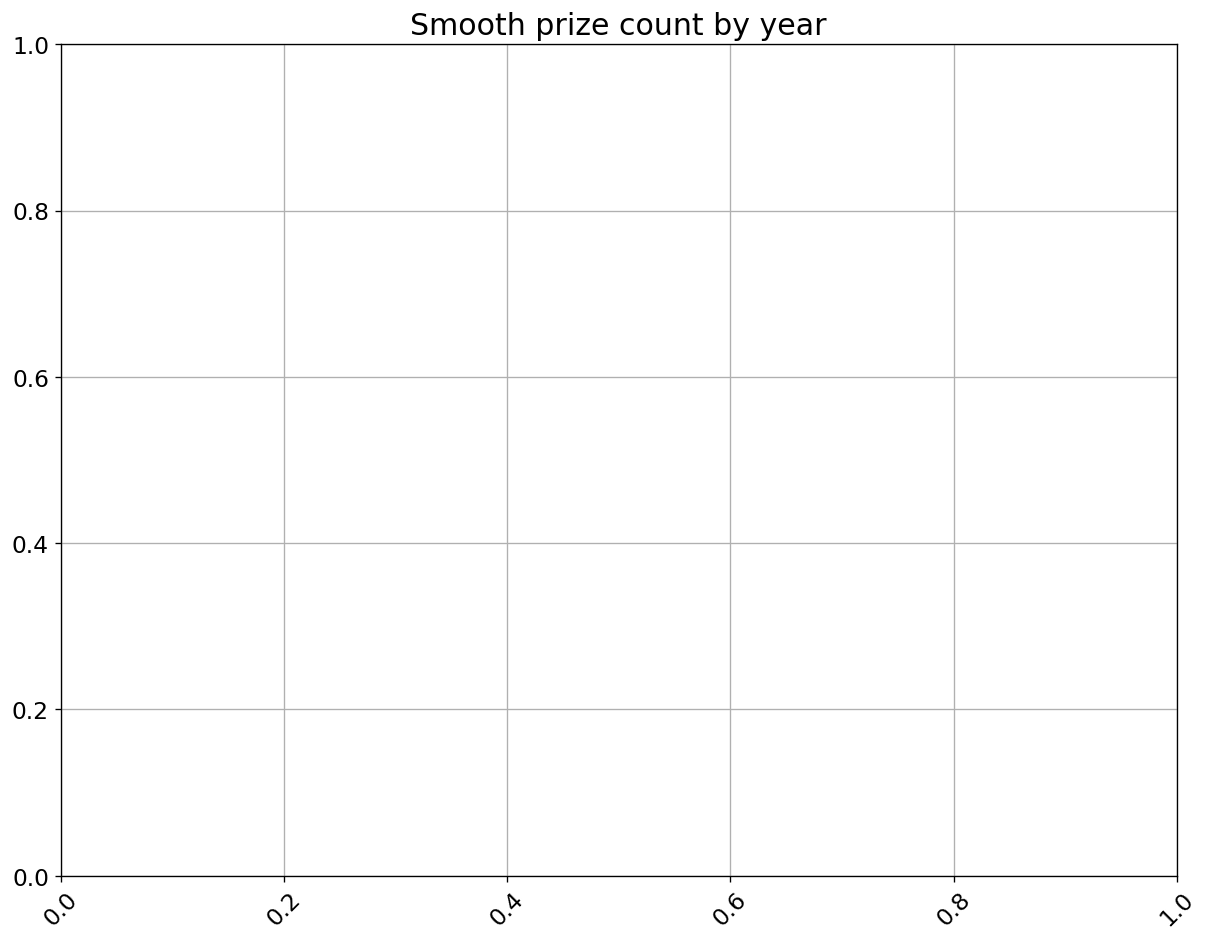

In [114]:
df_prize_count_smooth = df_data['year'].rolling(window=4).mean()
# df_prize_count_smooth
plt.figure (figsize=(12,9),
            dpi=120)
plt.xticks(size=14, rotation=45)
plt.yticks(size=14)
plt.title("Smooth prize count by year", fontsize=18)

plt.grid(True)
plt.scatter(prize_per_year.index,
         prize_per_year.values,
         )
plt.plot(prize_per_year.index,
         prize_smooth.values)
plt.show()



In [ ]:
prize_per_year = df_data.groupby(by='year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [ ]:
prize_smooth = prize_per_year.rolling(window=3).mean()
prize_smooth

year
1901     NaN
1902     NaN
1903    6.67
1904    6.67
1905    6.00
        ... 
2016   11.67
2017   11.33
2018   12.00
2019   13.00
2020   13.00
Name: prize, Length: 117, dtype: float64

In [ ]:
prize_smooth.index.min()

np.int64(1901)

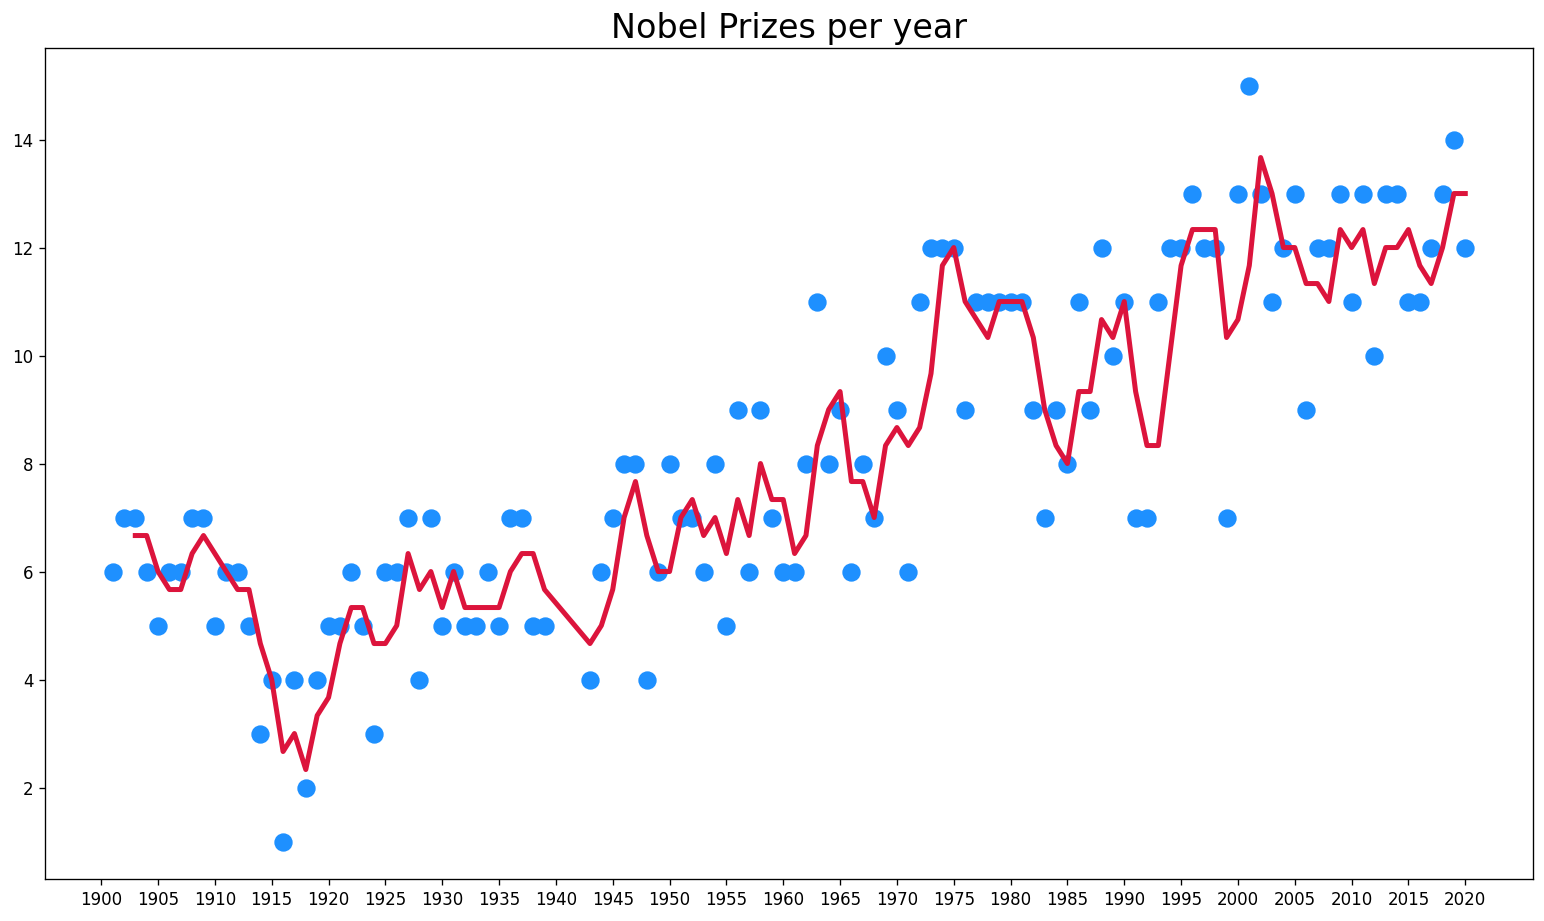

In [ ]:
plt.figure(figsize=(16,9), dpi=120)
plt.title("Nobel Prizes per year", fontsize=20)
plt.xticks(ticks=np.arange(1900, 2025, step=5))
plt.scatter(x = prize_per_year.index,
            y = prize_per_year.values,
            c='dodgerblue',
            alpha=1,
            s=100
            )
plt.plot(prize_per_year.index,
         prize_smooth.values,
         c='crimson',
         linewidth=3,
         )

plt.show()

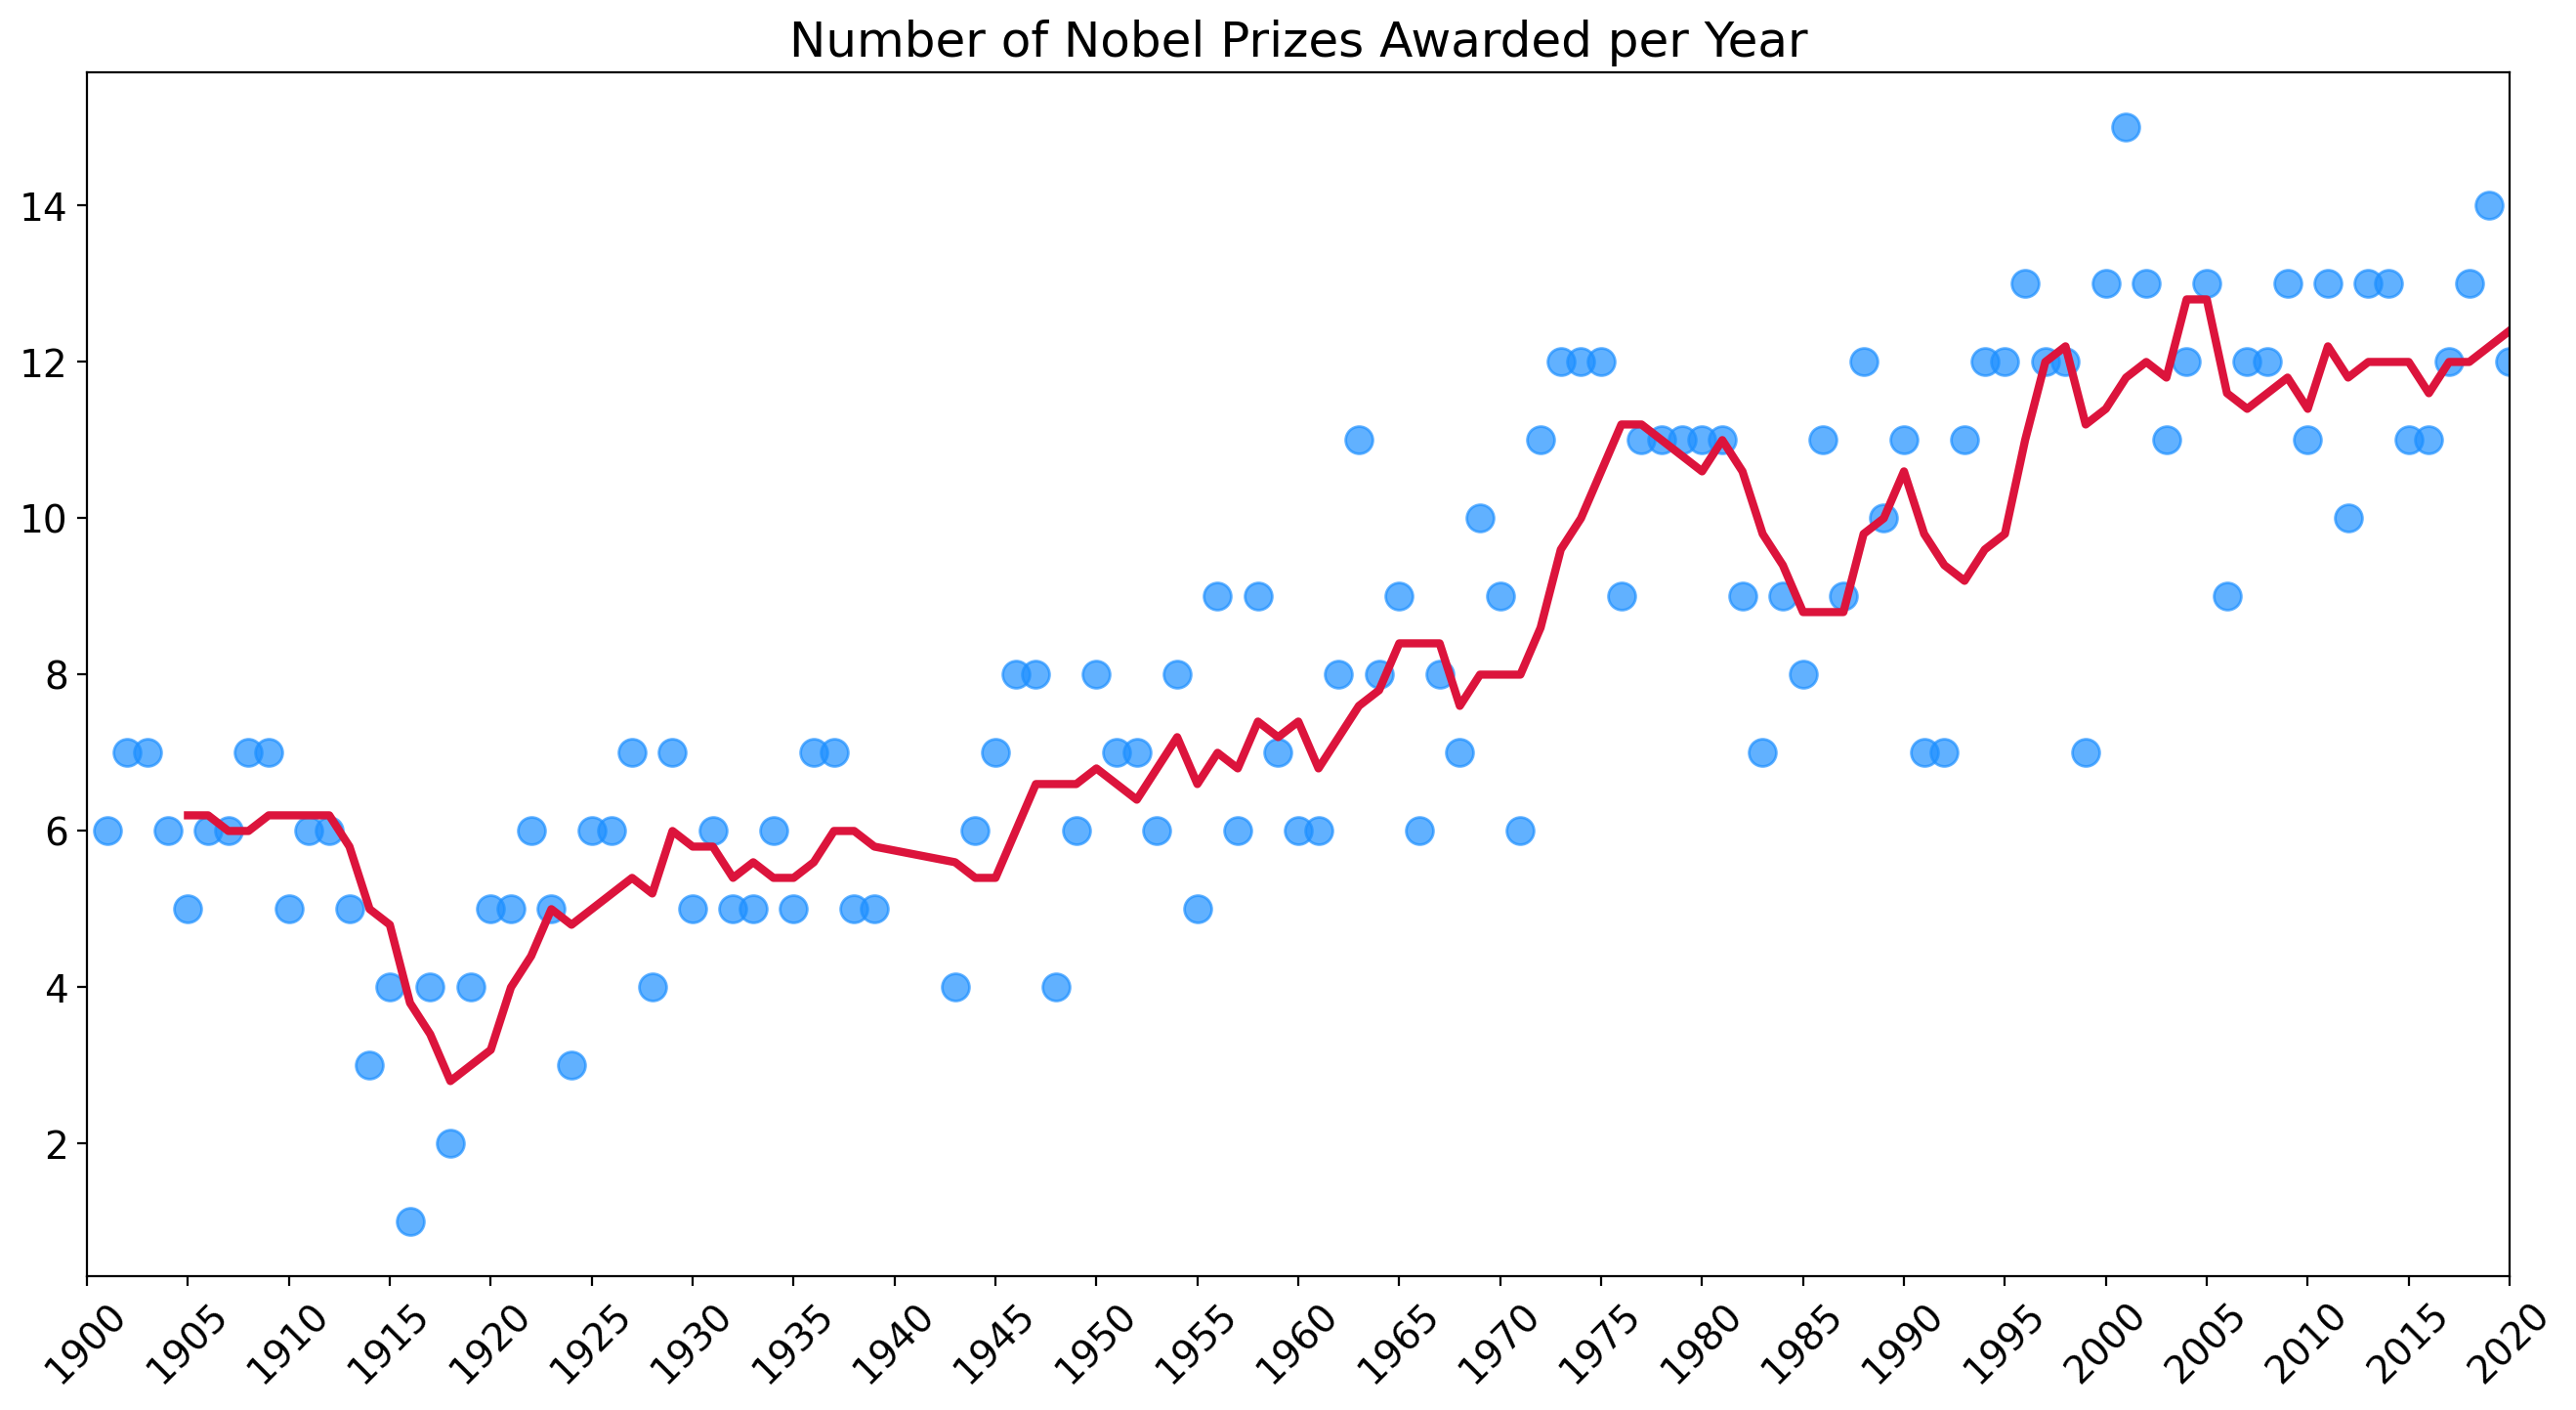

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [ ]:
prize_per_year = df_data.groupby(['year','category']).count()
print(prize_per_year)


                 prize  motivation  prize_share  laureate_type  full_name  \
year category                                                               
1901 Chemistry       1           1            1              1          1   
     Literature      1           1            1              1          1   
     Medicine        1           1            1              1          1   
     Peace           2           0            2              2          2   
     Physics         1           1            1              1          1   
...                ...         ...          ...            ...        ...   
2020 Economics       2           2            2              2          2   
     Literature      1           1            1              1          1   
     Medicine        3           3            3              3          3   
     Peace           1           1            1              1          1   
     Physics         3           3            3              3          3   

In [ ]:
yearly_share = df_data.groupby(by='year').agg({'share_pct':pd.Series.mean})
#yearly_share.head()
yearly_smooth = yearly_share.rolling(window=3).mean()
yearly_smooth.head()

,share_pct
year,
1901,NaN
1902,NaN
1903,0.75
1904,0.75
1905,0.85


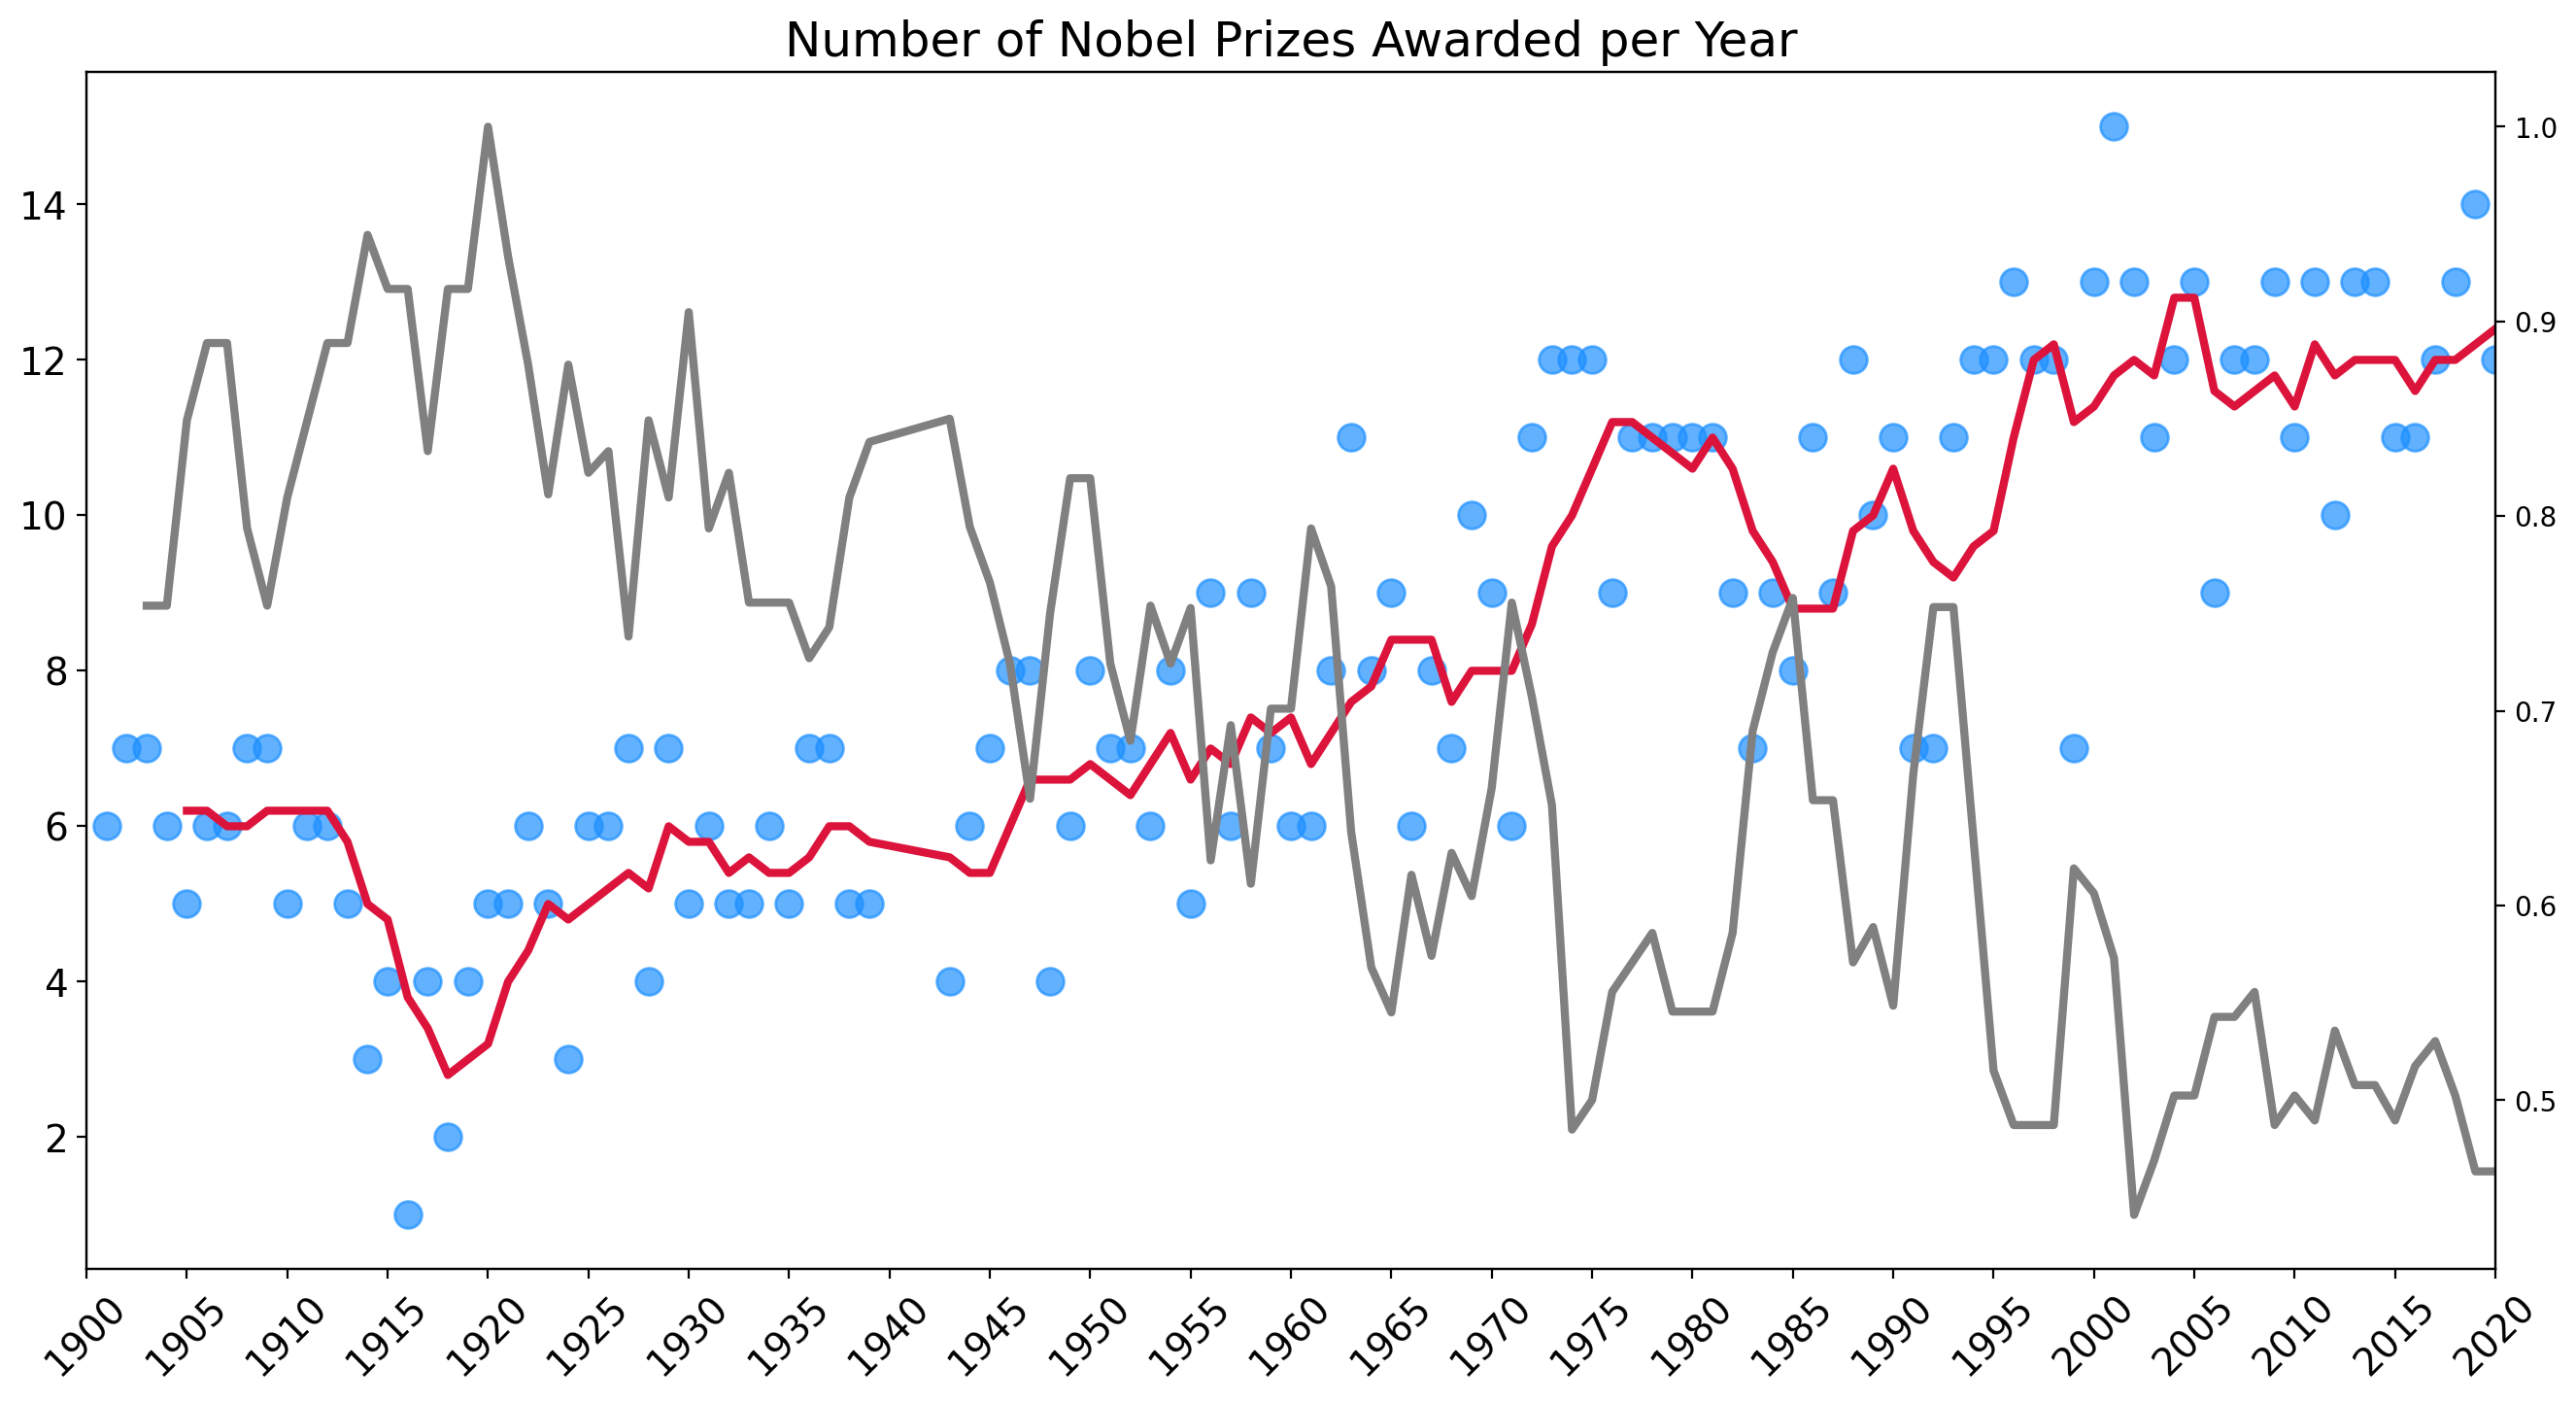

In [ ]:
prize_per_year = df_data.groupby(by='year').count().prize 
moving_average = prize_per_year.rolling(window=5).mean()

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        yearly_smooth.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()


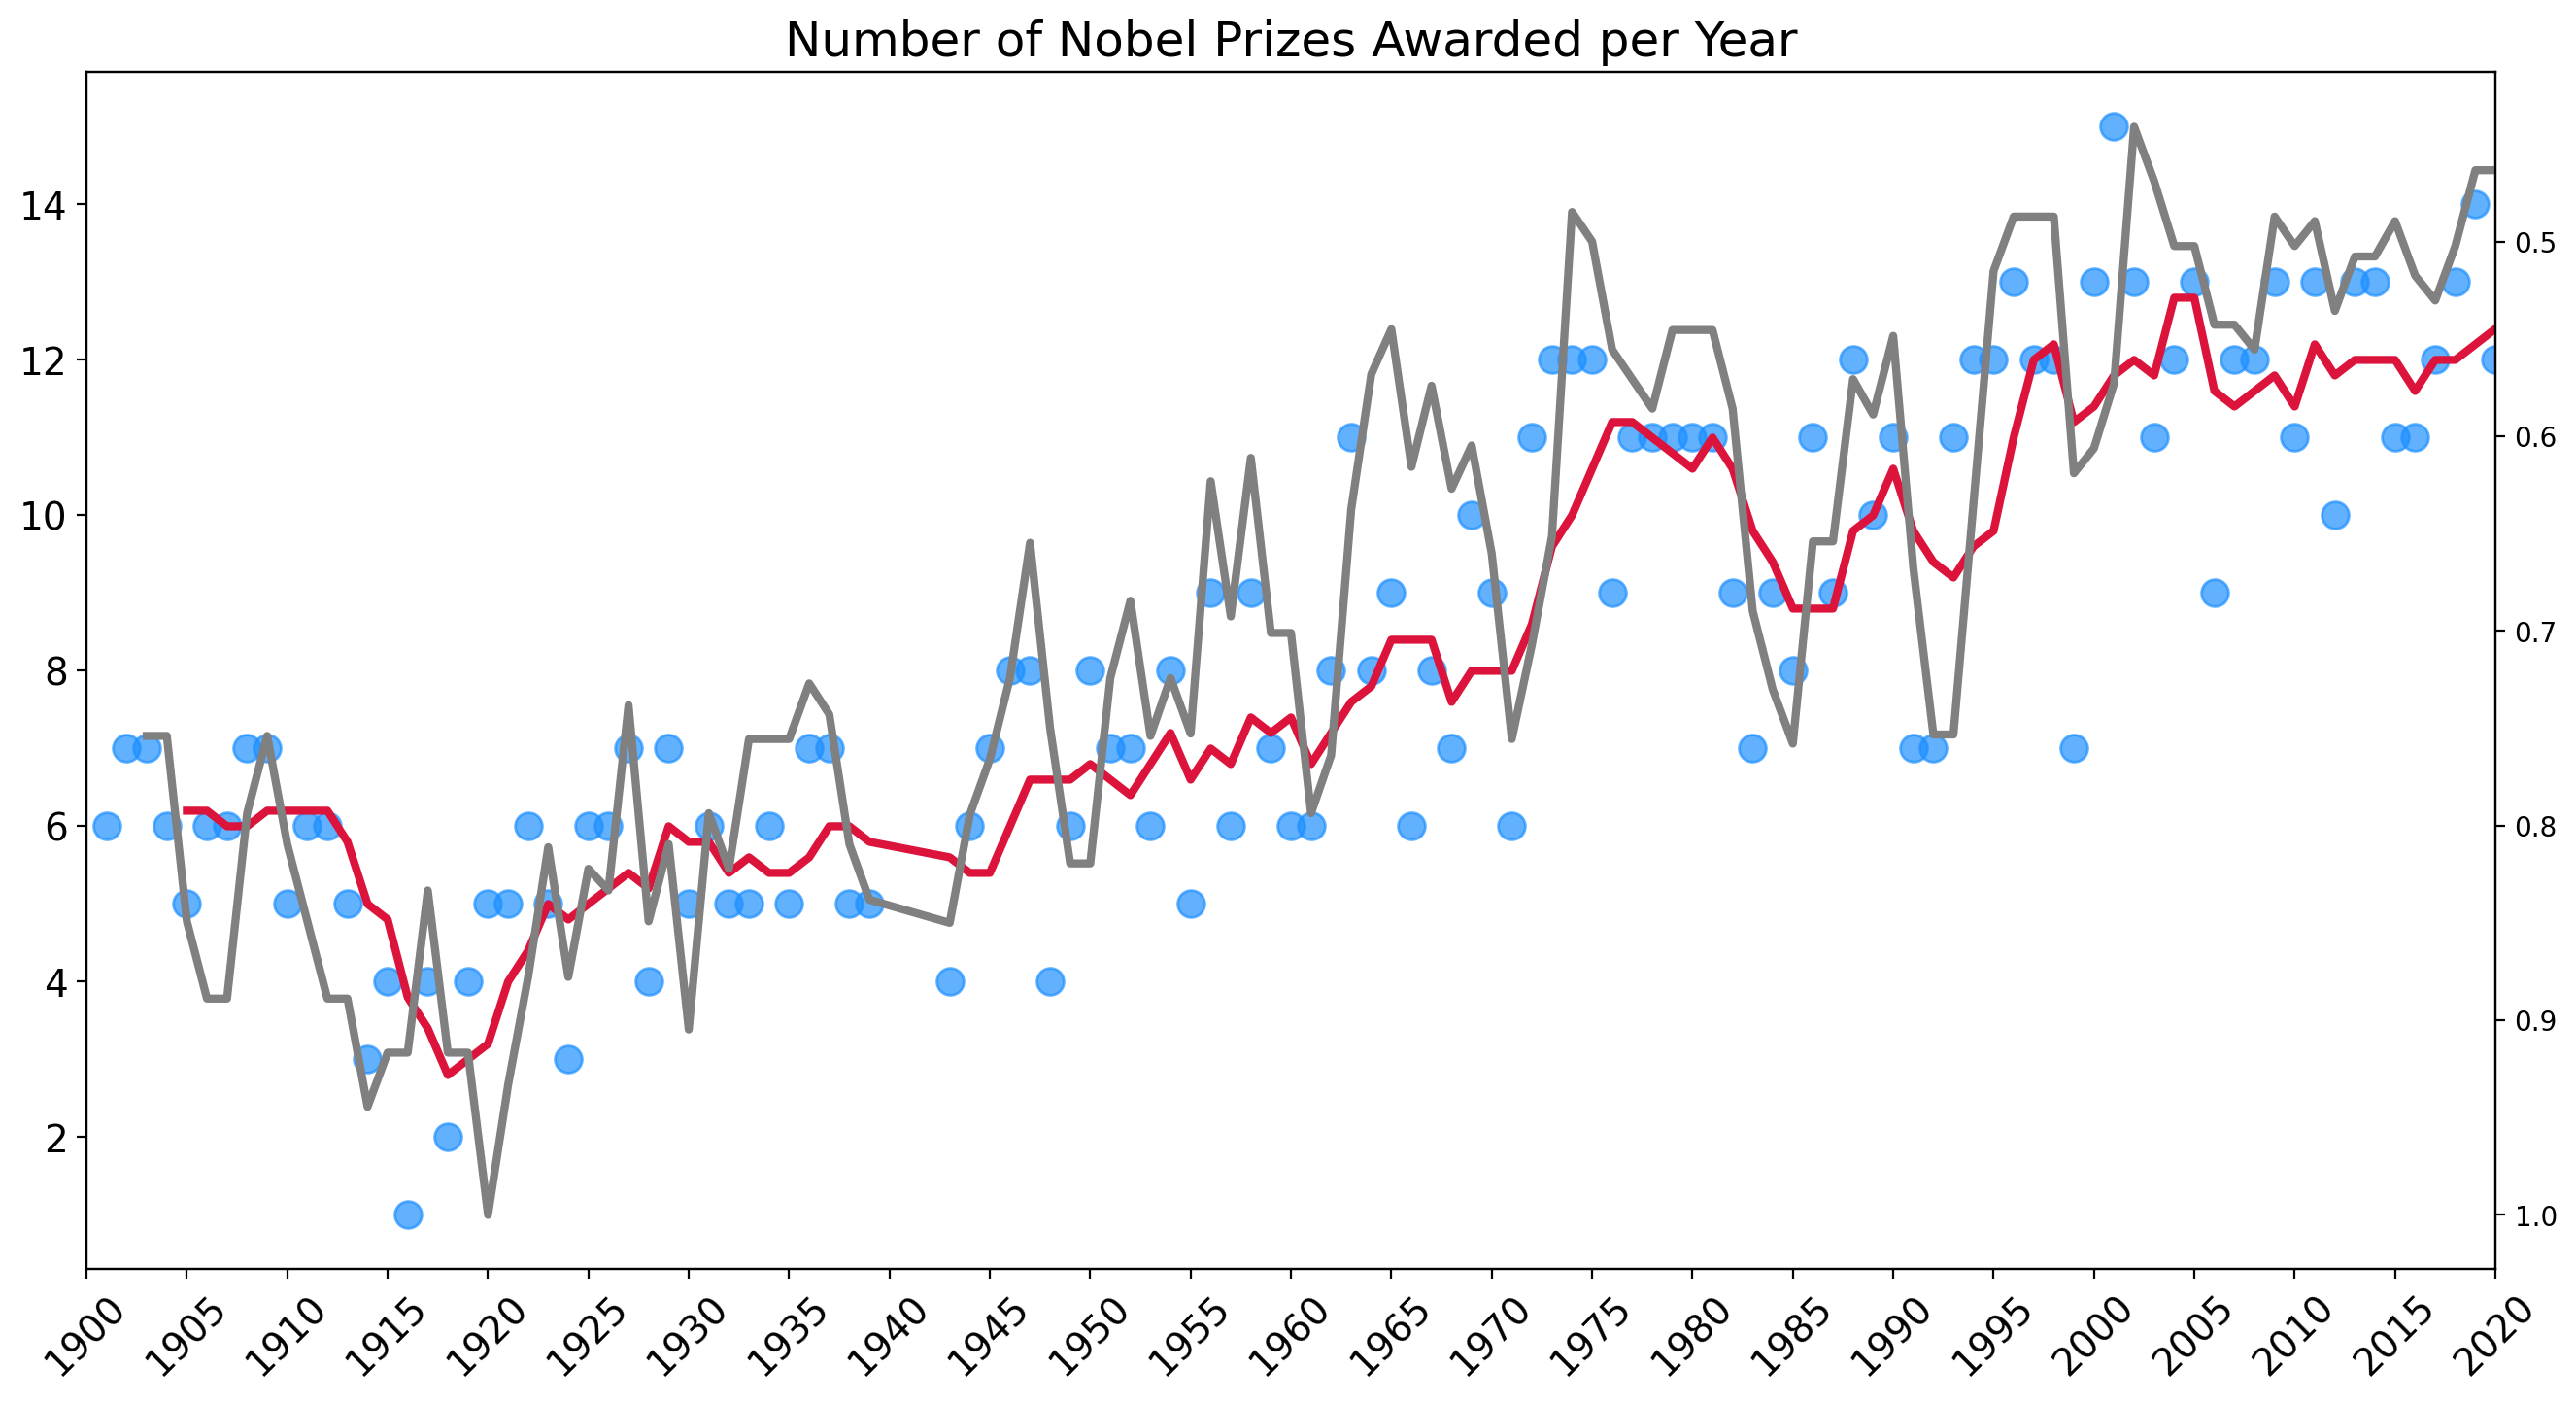

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
# Can invert axis
ax2.invert_yaxis()
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
ax2.plot(prize_per_year.index, 
        yearly_smooth.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [ ]:
top20_countries_bc = df_data.groupby(by='birth_country').agg({'prize':pd.Series.count})
top20_countries_bc.sort_values(by='prize', ascending=True).head(10)

,prize
birth_country,
Austria-Hungary (Austria),1
Austria-Hungary (Bosnia and Herzegovina),1
Austria-Hungary (Croatia),1
Bavaria (Germany),1
Austrian Empire (Czech Republic),1
Austria-Hungary (Ukraine),1
Austria-Hungary (Slovenia),1
Austria-Hungary (Poland),1
Austrian Empire (Italy),1


In [ ]:
top20_countries_bcc = df_data.groupby(by='birth_country_current', as_index=False).agg({'prize':pd.Series.count})
top20_countries_bcc.sort_values(by='prize', ascending=False, inplace=True)
top20_countries_bcc[:20]

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
57,Poland,27
40,Japan,27
61,Russia,26
11,Canada,20
39,Italy,19


In [ ]:
top20_countries_oc = df_data.groupby(by=['organization_country']).agg({'prize':pd.Series.count})
top20_countries_oc.sort_values(by='prize', ascending=True, inplace=True)


In [ ]:
top20_countries_bcc = df_data.groupby(by='birth_country_current', as_index=False).agg({'prize':pd.Series.count})
top20_countries_bcc.sort_values(by='prize', ascending=True, inplace=True)
top20_countries = top20_countries_bcc[-15:]

h_bar = px.bar(
    x = top20_countries.prize,
    y = top20_countries.birth_country_current,
    width=1024,
    height=768,
    orientation = 'h',
    color = top20_countries.prize,
    color_continuous_scale = 'Viridis',
    title="Top countries by prize count",
)

h_bar.update_layout(xaxis_title='Number of prizes',
                    yaxis_title = 'Country',
                    coloraxis_showscale=False
                    )
h_bar.show()



# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [ ]:
df_by_country.head()

,ISO,prize
0,ARG,4
1,AUS,10
2,AUT,18
3,AZE,1
4,BEL,9


In [ ]:
# See https://plotly.com/python/choropleth-maps/
df_by_country = df_data.groupby(by=['birth_country_current', 'ISO'], as_index=False).agg({'prize':pd.Series.count})
#df_by_country.sort_values(by="prize", ascending=False).head()
# Results are  index, ISO, prize
# geojson = px.data.election_geojson()

fig = px.choropleth(
    df_by_country,
    locations='ISO',
    hover_name='birth_country_current',
    color='prize',
    color_continuous_scale=px.colors.sequential.Plasma,
)

fig.show()

In [ ]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
#df_countries.head()
world = px.choropleth(df_countries,
                      locations='ISO',
                      color='prize',
                      hover_name='birth_country_current',
                      color_continuous_scale=px.colors.sequential.matter,
                      )


world.update_layout(coloraxis_showscale=True,)

world.show()


# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [ ]:
top20_countries_bcc = df_data.groupby(by=['birth_country_current', 'category'], as_index=False).agg({'prize':pd.Series.count})
top20_countries_bcc.sort_values(by='prize', ascending=True, inplace=True)
top20_countries = top20_countries_bcc[-15:]

h_bar = px.bar(
    x = top20_countries.prize,
    y = top20_countries.birth_country_current,
    width=1024,
    height=768,
    orientation = 'h',
    color = top20_countries.category,
    color_continuous_scale = 'Viridis',
    title="Top countries by prize count",
)

h_bar.update_layout(xaxis_title='Number of prizes',
                    yaxis_title = 'Country',
                    coloraxis_showscale=True,
                    )
h_bar.show()



In [ ]:
top20_countries.head()

,birth_country_current,category,prize
114,Japan,Physics,11
67,France,Literature,11
199,United Kingdom,Peace,11
68,France,Medicine,12
74,Germany,Medicine,18


In [ ]:
top20_countries_categories = top20_countries_bcc.sort_values(by=['prize', 'category'], ascending=True)[-20:]
cat_country = df_data.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})


In [ ]:
top20_countries_categories.head()

,birth_country_current,category,prize
65,France,Chemistry,10
203,United States of America,Literature,10
69,France,Peace,10
166,Russia,Physics,10
70,France,Physics,10


In [ ]:
h_bar = px.bar(
    x = top20_countries_categories.prize,
    y = top20_countries_categories.birth_country_current,
    width=1024,
    height=768,
    orientation = 'h',
    color = top20_countries_categories.category,
    color_continuous_scale = 'Viridis',
    title="Top countries by prize count",
)

h_bar.update_layout(xaxis_title='Number of prizes',
                    yaxis_title = 'Country',
                    coloraxis_showscale=True,
                    )
h_bar.show()


In [ ]:
top20_countries_categories.head()

,birth_country_current,category,prize
65,France,Chemistry,10
203,United States of America,Literature,10
69,France,Peace,10
166,Russia,Physics,10
70,France,Physics,10


In [ ]:
top20_countries.head()

,birth_country_current,category,prize
114,Japan,Physics,11
67,France,Literature,11
199,United Kingdom,Peace,11
68,France,Medicine,12
74,Germany,Medicine,18


In [ ]:
top_countries = df_data.groupby(['birth_country_current'], 
                                  as_index=False).agg({'prize': pd.Series.count})
 
top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

df_merge = pd.merge(cat_country,
                    top20_countries,
                    on='birth_country_current'
                    )

df_merge.head()


,birth_country_current,category,prize_x,prize_y
0,Australia,Chemistry,1,10
1,Australia,Medicine,7,10
2,Australia,Physics,2,10
3,Austria,Chemistry,5,18
4,Austria,Economics,1,18


In [ ]:
df_merge.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
df_merge.head()

,birth_country_current,category,cat_prize,total_prize
0,Australia,Chemistry,1,10
1,Australia,Medicine,7,10
2,Australia,Physics,2,10
3,Austria,Chemistry,5,18
4,Austria,Economics,1,18


In [ ]:
h_bar = px.bar(
    x = df_merge.cat_prize,
    y = df_merge.birth_country_current,
    width=1024,
    height=768,
    orientation = 'h',
    color = df_merge.category,
    color_continuous_scale = 'Viridis',
    title="Top countries by prize count",
)

h_bar.update_layout(xaxis_title='Number of prizes',
                    yaxis_title = 'Country',
                    coloraxis_showscale=True,
                    )
h_bar.show()


In [ ]:
df_merge.head()

,birth_country_current,category,cat_prize,total_prize
0,Australia,Chemistry,1,10
1,Australia,Medicine,7,10
2,Australia,Physics,2,10
3,Austria,Chemistry,5,18
4,Austria,Economics,1,18


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [ ]:
df_prizes_by_year = df_data.groupby(by=['year', 'birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
df_prizes_by_year.head()

,year,birth_country_current,prize
0,1901,France,2
1,1901,Germany,1
2,1901,Netherlands,1
3,1901,Poland,1
4,1901,Switzerland,1


In [ ]:
cumulative_prizes = df_prizes_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes.head()


,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3


In [ ]:
#plt.figure(figsize=(12,10), dpi=200)
# plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
# plt.yticks(fontsize=14)
# plt.xticks(ticks=np.arange(1900, 2021, step=5), 
#            fontsize=14, 
#            rotation=45)
 


line_chart = px.line(
    cumulative_prizes,
    x = 'year',
    y = 'prize',
    color =  'birth_country_current',
    height = 800,
    width = 1600,
)

line_chart.update_layout(
    title = 'Nobel prizes per year',
    xaxis_title = 'Year',
    yaxis_title = 'Number of prizes',
    legend_title = 'Country',
    

)

line_chart.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [ ]:
df_organizations = df_data.organization_name.value_counts()
df_organizations.sort_values(ascending=True, inplace=True)
df_top_orgs = df_organizations[-20:]
df_top_orgs


organization_name
Harvard Medical School                           7
Sorbonne University                              7
Institut Pasteur                                 7
London University                                7
Cornell University                               8
Bell Laboratories                                8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
Columbia University                             17
California Institute of Technology (Caltech)    17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of

In [ ]:
df_organizations = df_data.organization_name.value_counts()
df_organizations.sort_values(ascending=True, inplace=True)
df_top_orgs = df_organizations[-20:]
df_top_orgs

h_bar = px.bar(
    h_bar,
    y = df_top_orgs.index,
    x = df_top_orgs.values,
    color=df_top_orgs.index,
    orientation = 'h',
    width = 1400,
    height= 800,
    color_continuous_scale=px.colors.sequential.Viridis,
)

h_bar.update_layout(
    title='Top Nobel Prize winning Organizations',
    xaxis_title='Prize Count',
    yaxis_title='Organization Name',
    coloraxis_showscale=True
)
h_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [ ]:
df_org_cities = df_data.organization_city.value_counts()
df_org_cities.sort_values(ascending=True, inplace=True)
df_top_org_cities = df_org_cities[-20:]
df_top_org_cities

h_bar = px.bar(
    h_bar,
    y = df_top_org_cities.index,
    x = df_top_org_cities.values,
    color=df_top_org_cities.index,
    orientation = 'h',
    width = 1400,
    height= 800,
    color_continuous_scale=px.colors.sequential.Viridis,
)

h_bar.update_layout(
    title='Top Nobel Prize Organizations by Cities',
    xaxis_title='Prize Count',
    yaxis_title='City',
    coloraxis_showscale=True
)
h_bar.show()


# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [ ]:
df_birth_cities = df_data.birth_city.value_counts()
df_birth_cities.sort_values(ascending=True, inplace=True)
df_top_birth_cities = df_birth_cities[-20:]
# df_top_birth_cities

h_bar = px.bar(
    h_bar,
    y = df_top_birth_cities.index,
    x = df_top_birth_cities.values,
    color=df_top_birth_cities.index,
    orientation = 'h',
    width = 1400,
    height= 800,
    color_continuous_scale=px.colors.sequential.Viridis,
)

h_bar.update_layout(
    title='Top Nobel Prize by Birth City',
    xaxis_title='Prize Count',
    yaxis_title='Birth City',
    coloraxis_showscale=True
)
h_bar.show()


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [ ]:
# df_organizations = df_data.organization_name.value_counts()
# df_organizations.sort_values(ascending=True, inplace=True)
# df_top_orgs = df_organizations[-20:]
# df_top_orgs

# h_bar = px.bar(
#     h_bar,
#     y = df_top_orgs.index,
#     x = df_top_orgs.values,
#     color=df_top_orgs.index,
#     orientation = 'h',
#     width = 1400,
#     height= 800,
#     color_continuous_scale=px.colors.sequential.Viridis,
# )

# h_bar.update_layout(
#     title='Top Nobel Prize winning Organizations',
#     xaxis_title='Prize Count',
#     yaxis_title='Organization Name',
#     coloraxis_showscale=True
# )
# h_bar.show()

import plotly.express as px
df_sunburst = df_data.groupby(by=['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize':pd.Series.count})
df_sunburst.sort_values(by='prize', ascending=False, inplace=True)
print(df_sunburst.head())

sb = px.sunburst(df_sunburst, 
                 path=['organization_country', 'organization_city', 'organization_name'], 
                 values='prize', 
                 color='organization_country', 
                 color_continuous_scale='Inferno', 
                 width=1200, 
                 height=1200)

sb.show()

         organization_country organization_city  \
205  United States of America     Cambridge, MA   
280  United States of America      Stanford, CA   
206  United States of America     Cambridge, MA   
209  United States of America       Chicago, IL   
195  United States of America      Berkeley, CA   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  


# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [115]:
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html
# For this example, we're only using the difference in years, not accounting for the month and day since the award happens at different times of the year.
test_series = pd.Series(df_data.year - df_data.birth_date.dt.year)
# test_series
df_data['winning_age'] = pd.to_numeric(pd.Series(df_data.year - df_data.birth_date.dt.year))

# shares = df_data.prize_share.str.split('/', expand=True)
# df_data['share_pct'] = pd.to_numeric(shares[0])/pd.to_numeric(shares[1])
df_data.head()


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,73.00


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [116]:
print (f'The youngest age is: {df_data.winning_age.min()}')
print (f'The oldest age is: {df_data.winning_age.max()}')
df_data.describe()

The youngest age is: 17.0
The oldest age is: 97.0


,year,birth_date,share_pct,winning_age
count,962.00,934,962.00,934.00
mean,"1,971.82",1912-03-28 22:50:37.259100672,0.63,59.95
min,"1,901.00",1817-11-30 00:00:00,0.25,17.00
25%,"1,948.00",1892-04-06 00:00:00,0.33,51.00
50%,"1,977.00",1917-10-30 12:00:00,0.50,60.00
75%,"2,001.00",1937-04-24 18:00:00,1.00,69.00
max,"2,020.00",1997-07-12 00:00:00,1.00,97.00
std,33.81,NaN,0.29,12.62


In [117]:
df_data.sort_values(by=['winning_age'], inplace=False, ascending=True)
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,73.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33,71.00
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25,55.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25,68.00


In [118]:
df_data.sort_values(by=['winning_age'], inplace=False, ascending=False)


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00
933,2018,Physics,The Nobel Prize in Physics 2018,“for the optical tweezers and their applicatio...,1/2,Individual,Arthur Ashkin,1922-09-02,"New York, NY",United States of America,United States of America,Male,Bell Laboratories,"Holmdel, NJ",United States of America,USA,0.50,96.00
794,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,RUS,0.33,90.00
856,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,Individual,Lloyd S. Shapley,1923-06-02,"Cambridge, MA",United States of America,United States of America,Male,University of California,"Los Angeles, CA",United States of America,USA,0.50,89.00
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50,89.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,Organization,European Union (EU),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN
873,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,Organization,Organisation for the Prohibition of Chemical W...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN
897,2015,Peace,The Nobel Peace Prize 2015,"""for its decisive contribution to the building...",1/1,Organization,National Dialogue Quartet,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN
919,2017,Peace,The Nobel Peace Prize 2017,“for its work to draw attention to the catastr...,1/1,Organization,International Campaign to Abolish Nuclear Weap...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [119]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

In [120]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


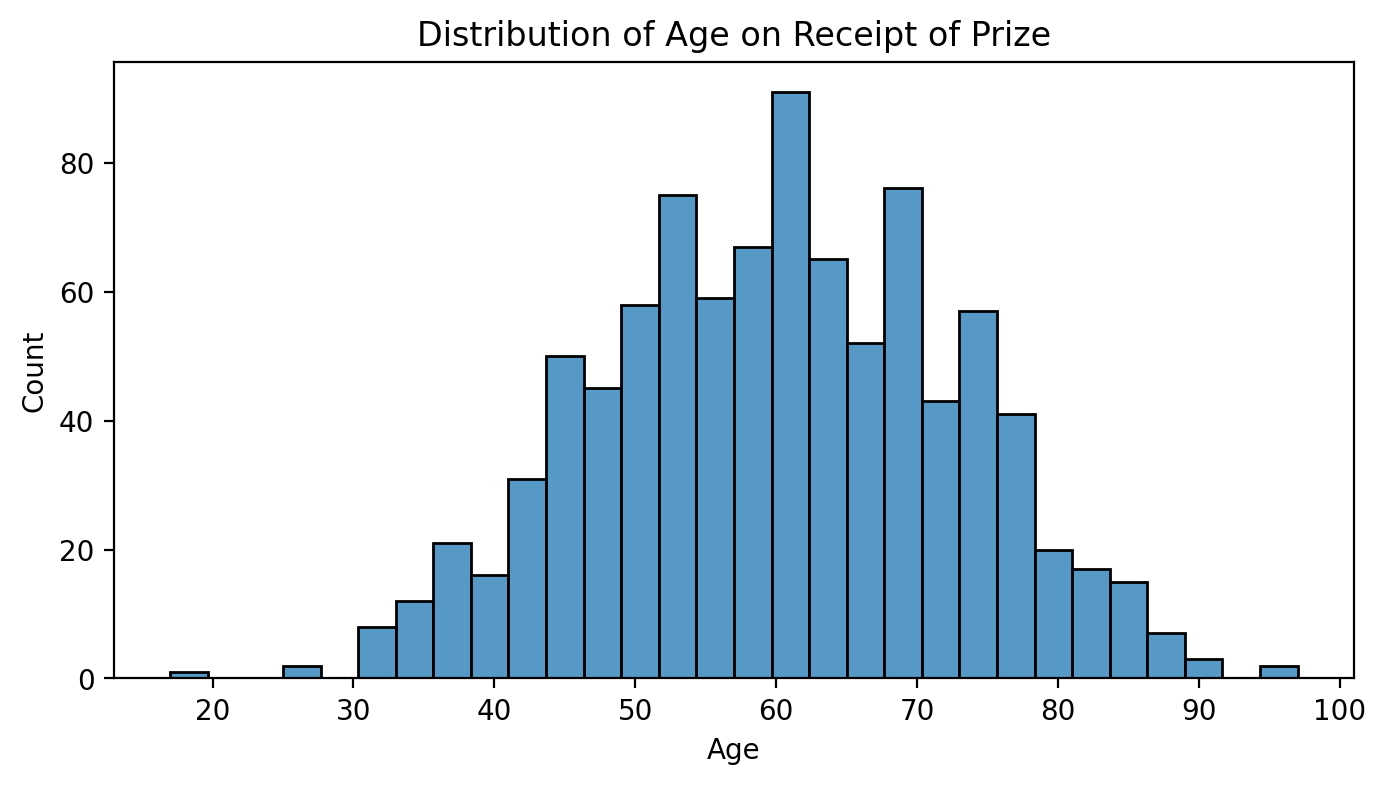

In [121]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()


### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


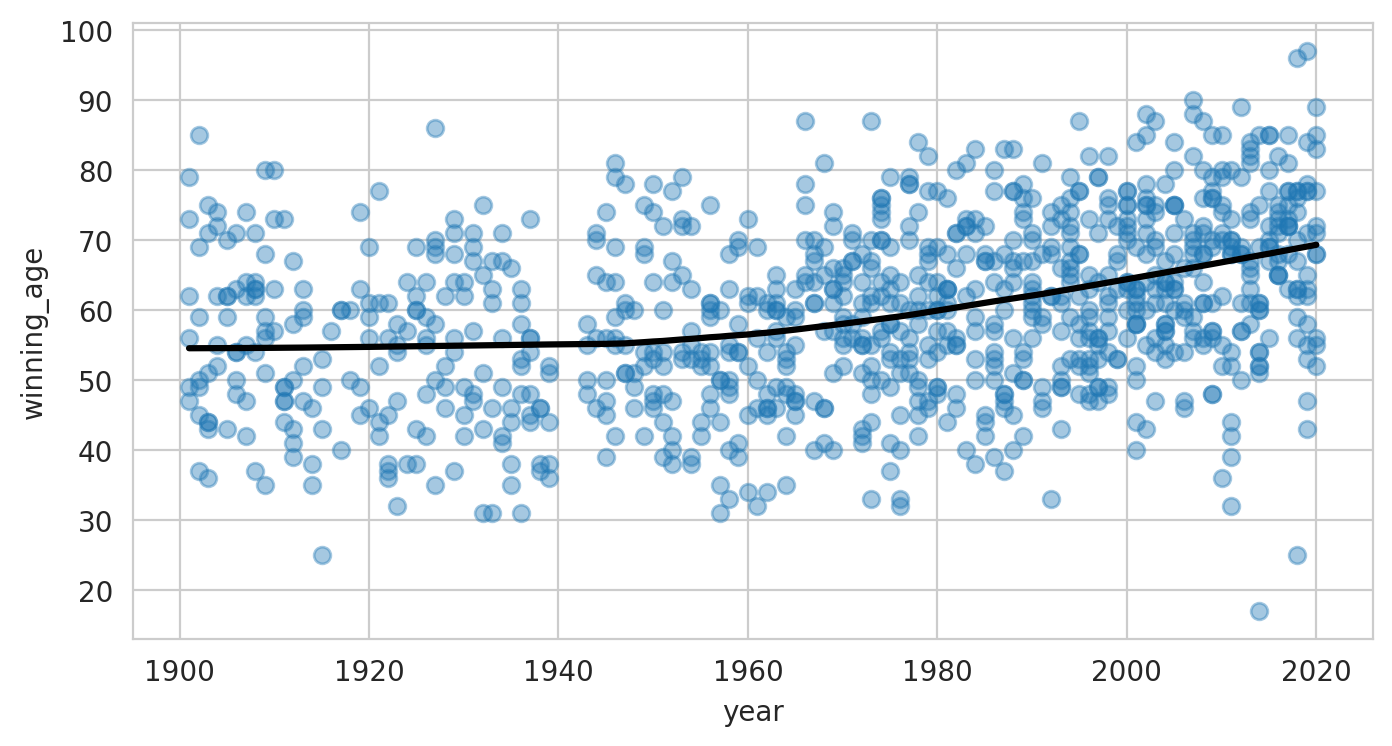

In [122]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

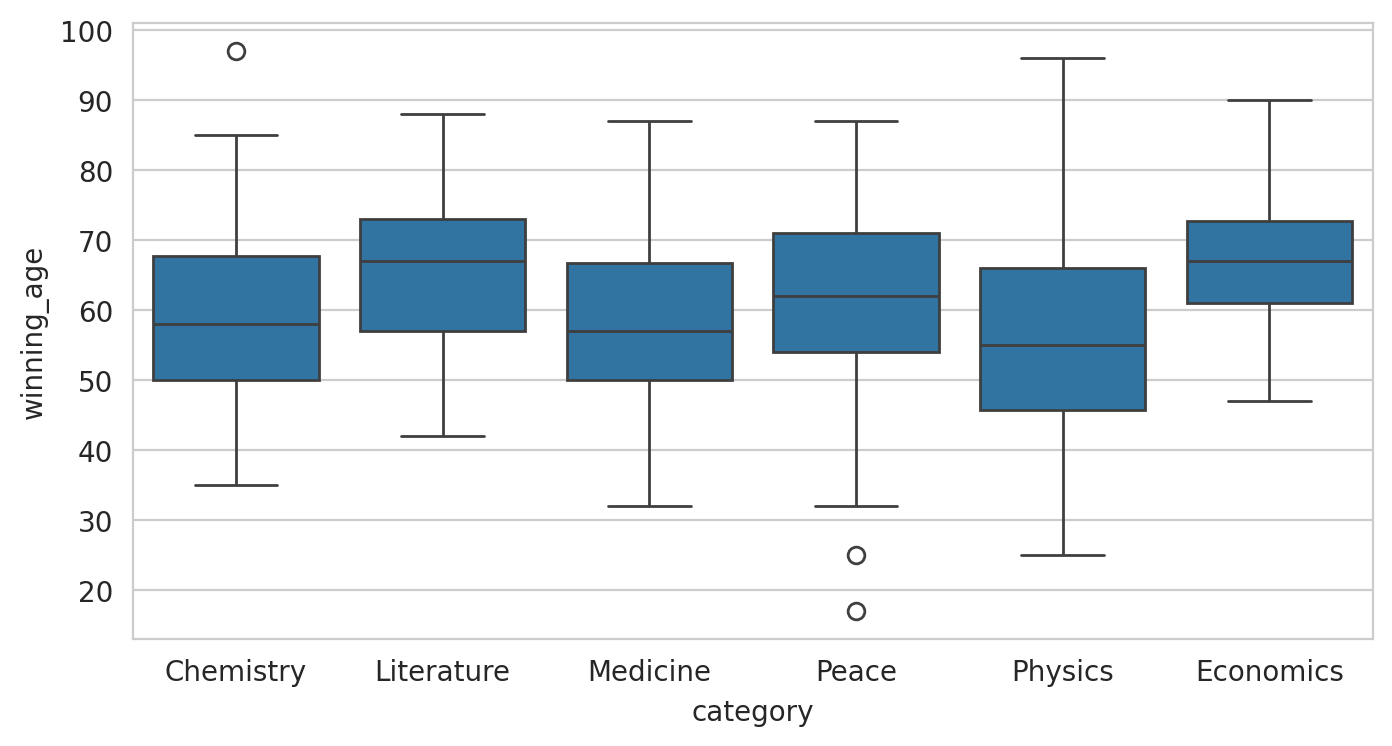

In [123]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


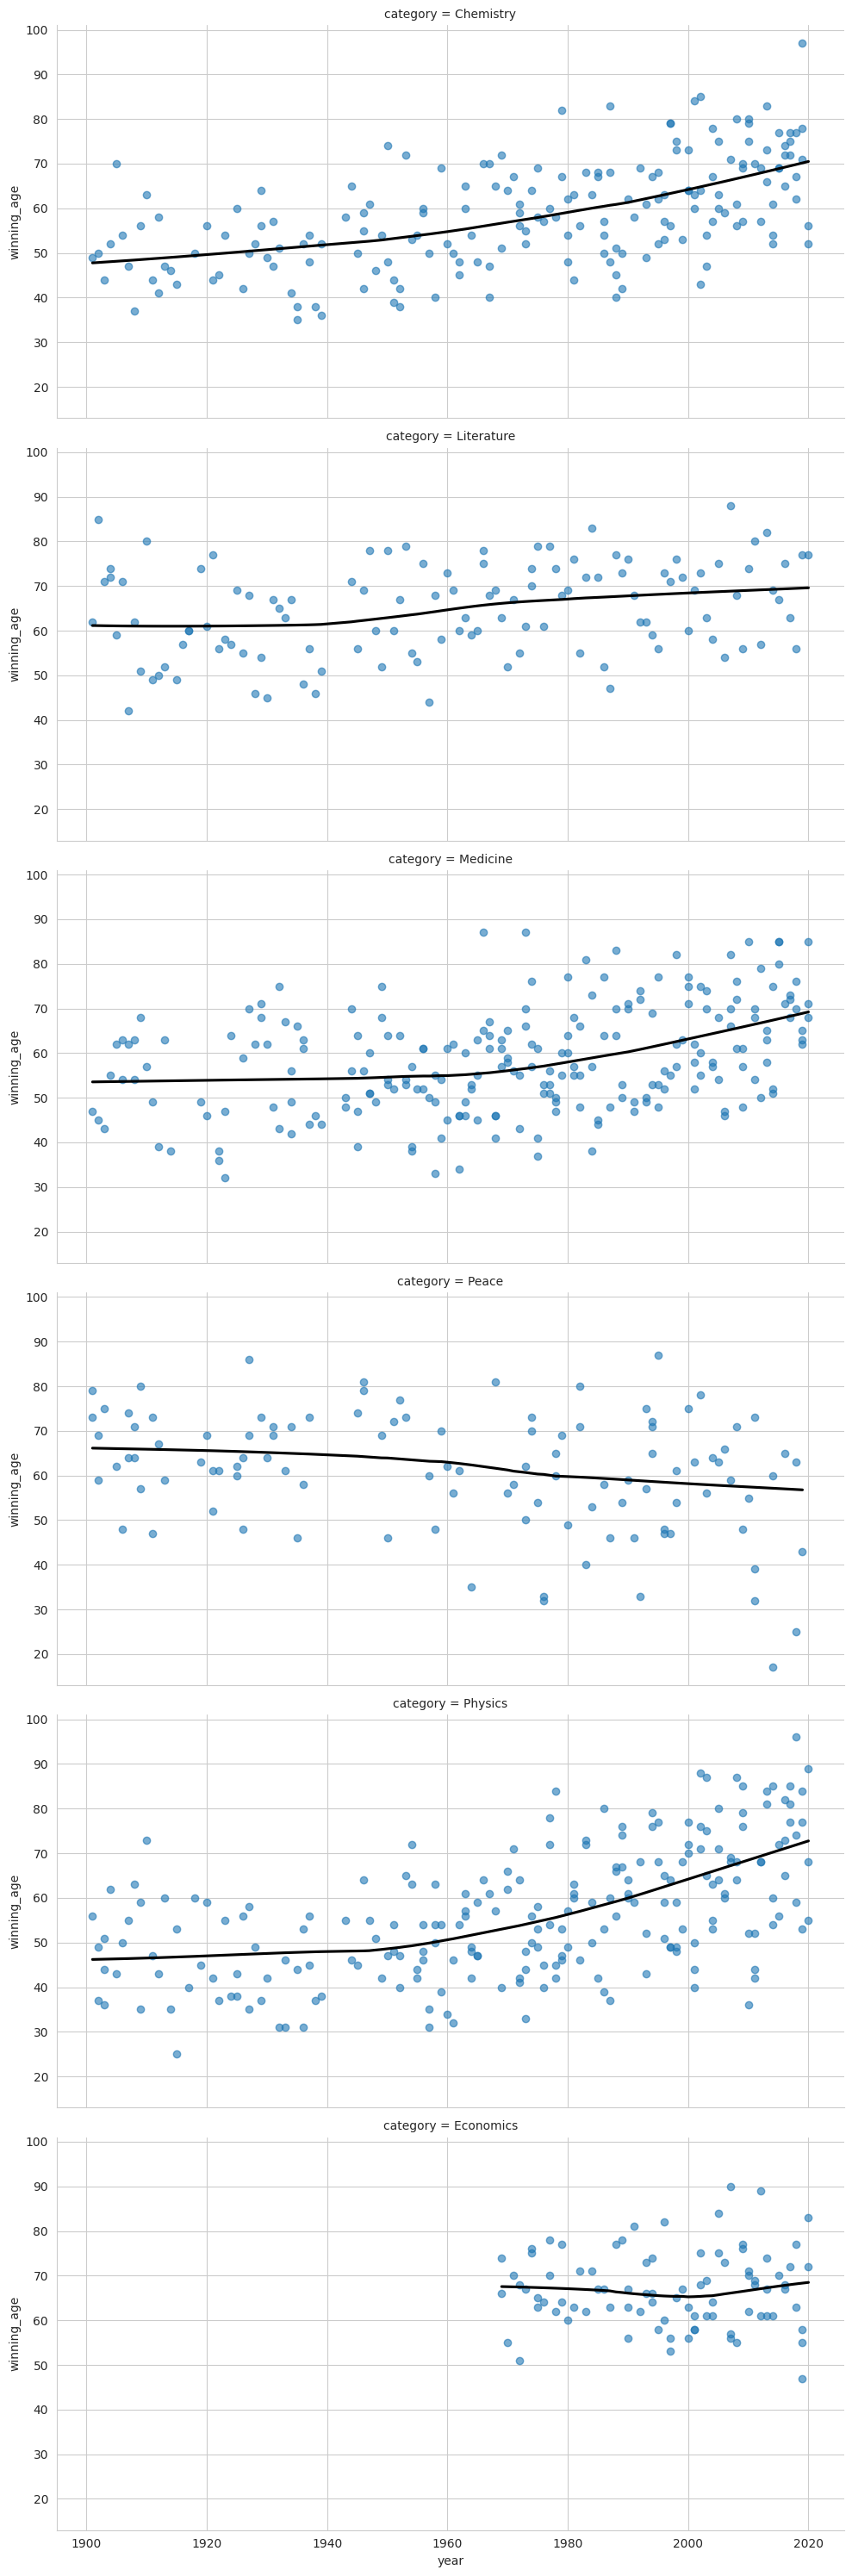

In [124]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

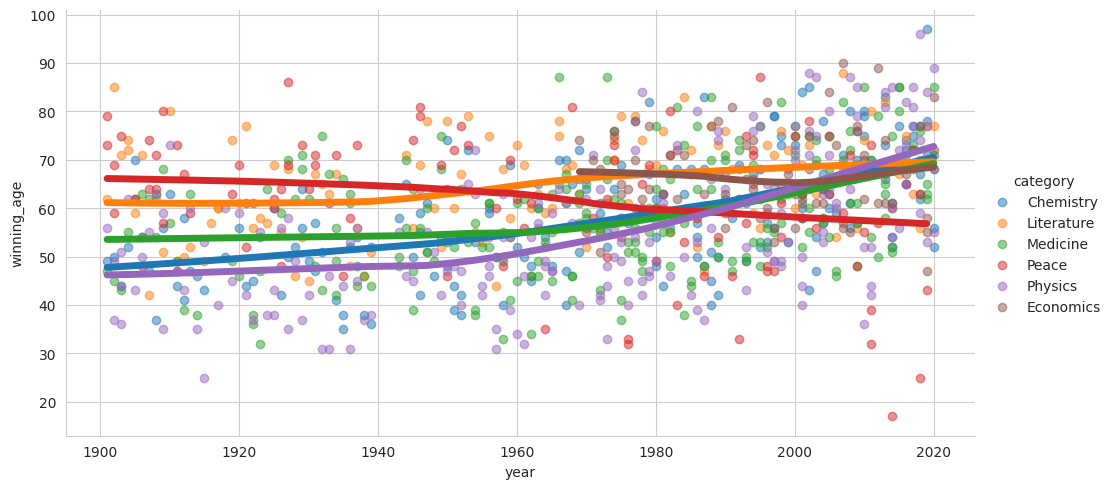

In [125]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})
 
plt.show()